# Chapitre 5 - La data visualisation avec Python (1ère partie)

## 5.4 Les graphiques interactifs avec d’autres packages et outils

### 5.4.2 Plotly pour la création de visualisation interactives


Plotly se sépare en plusieurs modules dont un module qui vous permettra de créer très rapidement des graphiques. Il s’agit de `plotly.express`.

Si nous voulons représenter les données Airbnb sous la forme d’un nuage
de points, on utilise :

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# on importe les données
listing=pd.read_csv("../data/listing_extrait.csv")
listing["price"]=pd.to_numeric(listing["price"].str.replace("$","")\
                               .str.replace(",",""))

On va extraire un DataFrame avec les logements à plus de 1000 euros et on les représente dans un graphique interactif. 

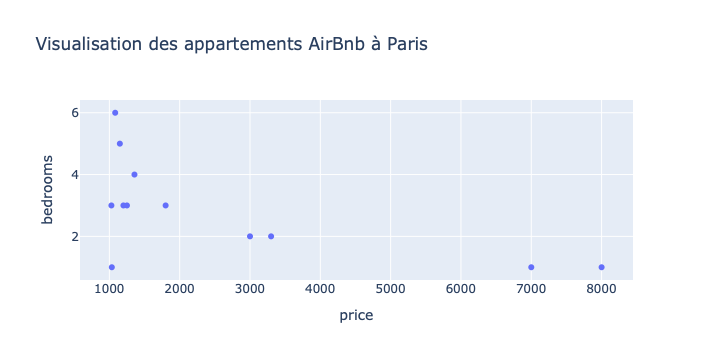

In [3]:
listing_chers = listing[listing["price"]>1000][["price","name","room_type","bedrooms"]]

fig = px.scatter(data_frame=listing_chers,
                 x="price",
                 y="bedrooms",
                hover_name="name",
                hover_data = "room_type",
                title = "Visualisation des appartements AirBnb à Paris")
fig

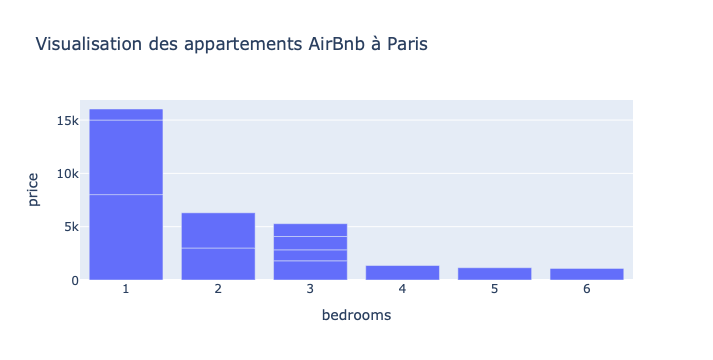

In [4]:
fig = px.bar(data_frame=listing_chers,
                 x="bedrooms",
                 y="price",
                hover_data = "room_type",
                title = "Visualisation des appartements AirBnb à Paris")
fig

Dans l’exemple précédent, nous avons affiché le graphique dans un notebook
Jupyter. Si nous désirons l’afficher sous forme d’un fichier indépendant, il s’agira
d’un fichier html. On utilisera le code suivant :

In [5]:
import plotly.express as px
fig = px.scatter(x=range(10), y=range(10))
fig.write_html("./fichier.html")

Si vous désirez aller plus loin avec l’utilisation de Plotly, vous devrez vous intéresser à l’API Plotly qui est composée de classes qui parfois peuvent être plus difficiles à manipuler. Par exemple, si vous désirez créer une figure avec plusieurs graphiques, vous devrez utiliser :

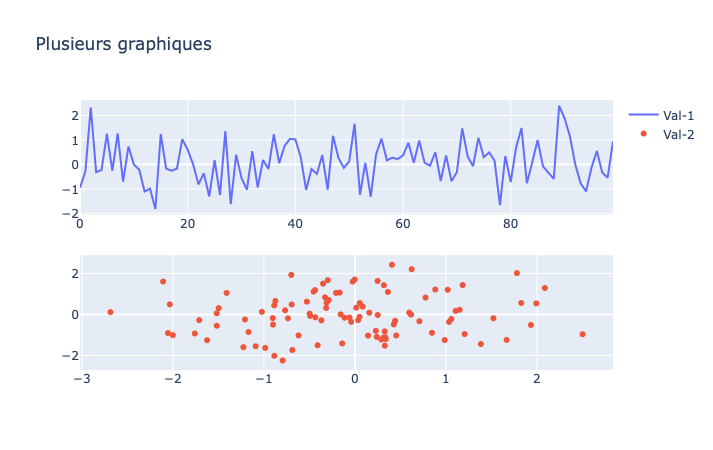

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# on crée une figure avec 2 graphiques
fig = make_subplots(rows=2, cols=1)

# on ajoute le premier graphique avec la classe Scatter()
fig.append_trace(go.Scatter(
    y=np.random.randn(100),mode="lines",name="Val-1"
), row=1, col=1)

# on ajoute le second graphique avec la classe Scatter()
fig.append_trace(go.Scatter(x=np.random.randn(100),
                            y=np.random.randn(100),
                            mode="markers",name="Val-2"), 
                 row=2, col=1)

# on définit le layout et le titre
fig.update_layout(height=450, width=716, title_text="Plusieurs graphiques")

# on affiche le graphique
fig.show()

### 5.4.3 Création d’une application web avec Dash ou Streamlit
La représentation précédente permet de visualiser des données, mais celles-ci sont stockées dans le fichier html créé ou dans le notebook. Bien souvent, on voudra aller plus loin et créer une application interactive sur les données.

#### Application web avec Dash

L’exemple donné ici est un exemple simple avec lancement de l’application en local. Nous allons donc créer un fichier appli-dash.py et, une fois ce fichier complété, nous pourrons l’utiliser pour lancer notre application avec Dash.

In [7]:
import pandas as pd
import dash
from dash import html
from dash import dcc
import dash_bootstrap_components as dbc
import plotly.express as px
from dash.dependencies import Input, Output

# on récupère les données et on sélectionne les colonnes
df = pd.read_csv('../data/listing_extrait.csv')

df = df[['review_scores_accuracy', 'review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication',
         'review_scores_location', 'review_scores_value']]

# On initialise l'app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.UNITED])

# on définit le format de l'app
app.layout = html.Div(children=[
    html.H1('Notes données aux appartements à Paris',
            style={'textAlign':'center'}),
    html.Br(),
    dcc.Dropdown(
        options=[{'label': i, 'value': i} for i in df.columns],
        value='review_scores_accuracy',
        id='dropdown',
        style={"width": "50%", "offset":1,},
        clearable=False,
    ),
    dcc.Graph(id='histogram')
])

@app.callback(
    Output(component_id='histogram', component_property='figure'),
    Input(component_id='dropdown', component_property='value'),
)
def update_hist(feature):
    fig = px.histogram(df, x=feature)
    return fig

# cette partie du code permet de lancer l'app lorsqu'on appelle python
if __name__ == "__main__":
    app.run_server(debug=True)

ModuleNotFoundError: No module named 'dash'

Dans ce code, nous avons donc plusieurs parties :
- une première partie d’import de package (il faut vérifier que tous les packages ont été installés) ;
- une partie d’importation de données ;
- une partie de définition de l’application avec la classe Dash() et la partie layout. Dans cette partie, on définit les différents éléments notamment le dropdown qui crée un menu déroulant avec une valeur par défaut et la définition du
graphique qui ici est un histogramme ;
- ensuite vient la partie callback, il s’agit de fonctions permettant de mettre à jour le graphique lorsqu’on modifie certaines informations. On a un décorateur qui permet de définir les entrées et les sorties de l’application et ensuite une fonction qui définit ce qui se passe lorsque le menu dropdown est modifié ;
- finalement, on a un code qui permet de lancer l’application lorsqu’on utilise la commande `python app_dash.py`

Nous utilisons donc dans l’invite de commandes générale, ou dans celle d’Anaconda, la commande suivante :
```
python app_dash.py
```

L'application est donc lancée sur le serveur Dash en local et vous pouvez y accéder en utilisant le lien : `http://127.0.0.1:8050/`

Cette application web permet d’afficher la distribution des notes données aux appartements parisiens proposés par Airbnb.

Cet exemple se fait en local sur votre machine mais il est aisé de développer et de partager une application sur un serveur via une page web.

#### Application web avec Streamlit

Streamlit est un outil alternatif à Dash permettant de construire une application web en quelques lignes de codes. Même si les capacités de Streamlit sont plus réduites que celles de Dash, sa simplicité et les possibilités d’intégration de nombreux graphiques vous permettront de construire vos applications très
rapidement.

Le fonctionnement de l’application est similaire, vous construisez un fichier `app_streamlit.py` et vous lancez dans le terminal la commande :
```
streamlit run app_streamlit.py
```
Streamlit va lancer la lecture de votre code et vous pourrez accéder à l’application.

À la différence de Dash, on construit ici notre application comme un script decode qui va être in terprété. Il n’y a pas besoin de fonctions ou de callback, ce qui permet de créer un code de manière beaucoup plus simple.

Voici un code simple pour une application web sur les données Airbnb :

In [8]:
import streamlit as st
import pandas as pd
import plotly.express as px

df = pd.read_csv('../data/listing_extrait.csv')
df = df[['review_scores_accuracy', 'review_scores_cleanliness',
         'review_scores_checkin', 'review_scores_communication',
         'review_scores_location', 'review_scores_value']]

st.title('Notes données aux appartements à Paris')

feature = st.selectbox(
    'Quelle colonne afficher ?',
    [i for i in df.columns])

fig = px.histogram(df, x=feature)

st.plotly_chart(fig)

2025-12-27 18:40:50.966 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.990 
  command:

    streamlit run /opt/anaconda3/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-12-27 18:40:50.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-27 18:40:50.991 Thread 'MainThread': m

DeltaGenerator()